<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-17-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 17: Statistical significance



In [1]:
library(tidyverse)

theme_set(theme_bw())

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.7      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
set.seed(1)

Warning message:
“Removed 1 rows containing missing values (geom_bar).”
Warning message:
“Removed 1 rows containing missing values (geom_bar).”


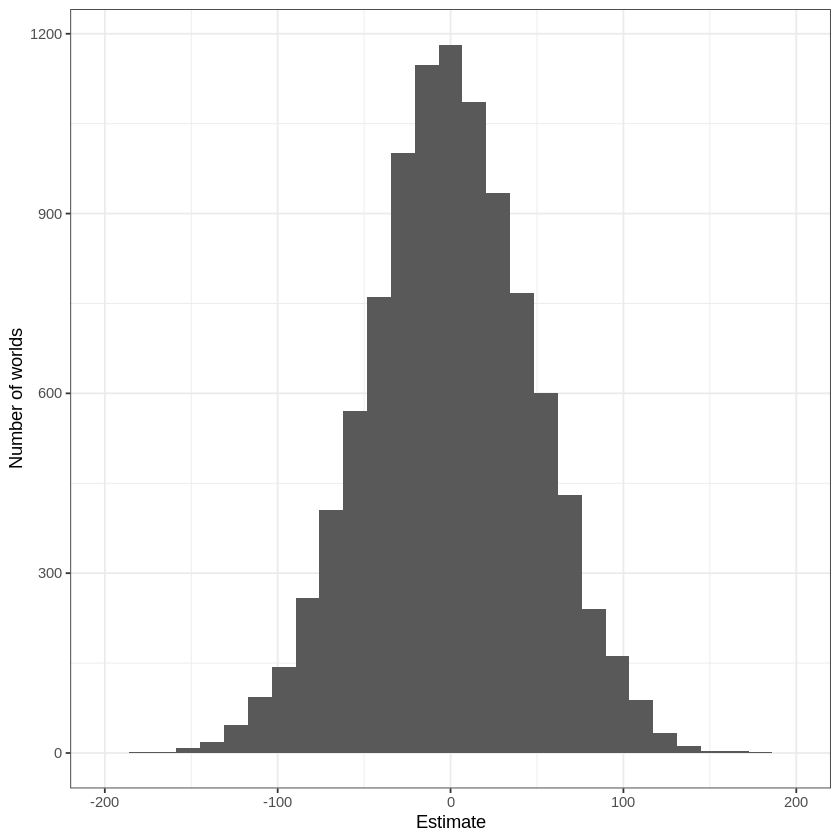

In [3]:
estimates <- rnorm(1e4, mean=0, sd=47)

ggplot(tibble(Estimate = estimates), aes(x = Estimate)) +
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous(limits=c(-200, 200))
ggsave('null-diff-in-means.png', width=4, height=4)

In [4]:
obs <- 37
pvalue <- mean(estimates >= obs | estimates <= -obs)
pvalue

[1] 0.4351

In [2]:
z <- (37 - 0) / 47
z

[1] 0.787234

In [3]:
pvalue <- 2*pnorm(-abs(z))
pvalue

[1] 0.4311449

In [7]:
obs <- 100
pvalue <- mean(estimates >= obs | estimates <= -obs)
pvalue

[1] 0.0369

In [4]:
z <- (100 - 0) / 47
z

[1] 2.12766

In [5]:
pvalue <- 2*pnorm(-abs(z))
pvalue

[1] 0.03336532

In [10]:
estimates <- rnorm(1e6, mean=0.42, sd=0.02)

obs <- 0.385
pvalue <- mean(abs(estimates - 0.42) >= abs(0.42 - obs))
pvalue


[1] 0.080528

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


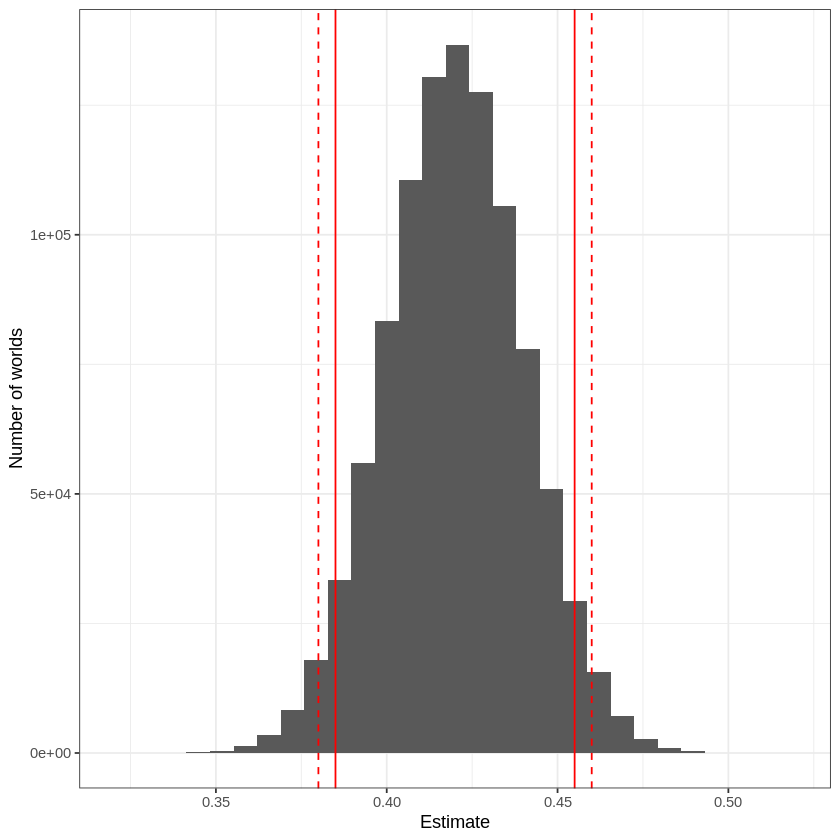

In [11]:
ggplot(tibble(Estimate = estimates), aes(x = Estimate)) +
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous(limits=c(.32, .52)) +
  geom_vline(xintercept = 0.455, color='red') +
  geom_vline(xintercept = 0.385, color='red') +
  geom_vline(xintercept = 0.46, color='red', linetype='dashed') +
  geom_vline(xintercept = 0.38, color='red', linetype='dashed')
ggsave('null-diff-in-prop.png', width=4, height=4)

In [12]:
estimates <- rnorm(1e6, mean=0.42, sd=0.015)

obs <- 0.385
pvalue <- mean(abs(estimates - 0.42) >= abs(0.42 - obs))
pvalue

[1] 0.019625

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


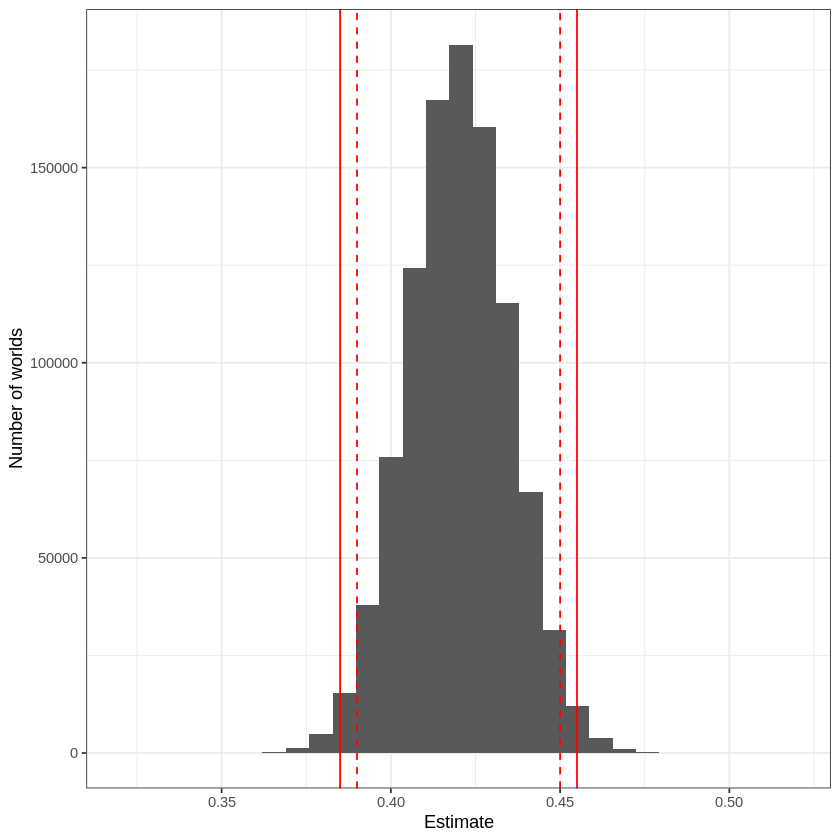

In [13]:
ggplot(tibble(Estimate = estimates), aes(x = Estimate)) +
  geom_histogram(bins=30) +
  scale_y_continuous('Number of worlds') +
  scale_x_continuous(limits=c(.32, .52)) +
  geom_vline(xintercept = 0.455, color='red') +
  geom_vline(xintercept = 0.385, color='red') +
  geom_vline(xintercept = 0.45, color='red', linetype='dashed') +
  geom_vline(xintercept = 0.39, color='red', linetype='dashed')
ggsave('null-diff-in-prop2.png', width=4, height=4)

In [14]:
n <- 600
p_hat <- 231 / 600

s <- sqrt(p_hat*(1-p_hat)/n)

c(p_hat - 2*s, p_hat + 2*s)

[1] 0.3452697 0.4247303

In [15]:
n <- 1200
p_hat <- 462 / 1200

s <- sqrt(p_hat*(1-p_hat)/n)

c(p_hat - 2*s, p_hat + 2*s)

[1] 0.3569064 0.4130936